# **Transformando la agricultura con ciencia de datos y percepción remota: Modelación del estatus de actividad agrícola y generación de estadísticas agrícolas**

En este notebook, se presenta un proyecto de ciencia de datos y percepción remota que utiliza imágenes satelitales para analizar el estatus de actividad agrícola y generar estadísticas agrícolas automatizadas.

# Introducción

La agricultura es uno de los pilares fundamentales de la economía y la sociedad, ya que provee de alimentos y materias primas para la industria. Sin embargo, la generación de estadísticas agrícolas precisas y actualizadas puede ser un desafío debido a la necesidad de recopilar datos en campo de manera regular, lo que resulta costoso en términos de tiempo y recursos.

Para abordar este problema, se desarrolló un proyecto de ciencia de datos y percepción remota que utiliza imágenes satelitales para analizar el estatus de actividad agrícola y generar estadísticas agrícolas automatizadas. Esto permite obtener información precisa y actualizada sin la necesidad de recopilar datos en campo de manera constante, lo que resulta en una reducción significativa de costos.



# Descripción del Problema

Tradicionalmente, la recopilación de datos en campo ha sido la principal fuente de información para generar estadísticas agrícolas. Este enfoque implica una serie de desafíos, tales como:

* Altos costos: La recopilación de datos en campo requiere de personal, transporte y tiempo, lo que resulta en un proceso costoso, especialmente en áreas de difícil acceso o extensas.
* Tiempo y esfuerzo: El proceso de recolección y análisis de datos en campo es laborioso y puede llevar mucho tiempo, lo que dificulta la obtención de información actualizada de manera frecuente.
* Errores y sesgos: La recopilación manual de datos puede estar sujeta a errores humanos y sesgos, lo que puede afectar la calidad y precisión de las estadísticas agrícolas.
* Cambios temporales y estacionales: La dinámica de los cultivos cambia a lo largo del tiempo debido a factores estacionales y climáticos, lo que requiere una monitorización constante para mantener la información actualizada.

En este contexto, nuestro proyecto busca abordar estos desafíos mediante el uso de imágenes satelitales y técnicas de ciencia de datos para analizar y clasificar automáticamente las áreas agrícolas y generar estadísticas relevantes.

# Objetivo

El objetivo de este proyecto es modelar el estatus de actividad agrícola y generar estadísticas agrícolas automatizadas.

# Preguntas de investigación 

1 - ¿Es posible identificar y diferenciar con precisión las superficies preparadas para siembra y las superficies sembradas utilizando imágenes satelitales y técnicas de aprendizaje automático?

2 - ¿Cuales son las variables mas correlacionadas a los distintos estatus de actividad agrícola?

3- ¿Cuál es el modelo más efectivo, árbol de decisión o redes neuronales, para la clasificación precisa de los diferentes estatus de actividad agrícola utilizando imágenes satelitales?


# Obtención de datos y generación del dataset

Se recopilaron imágenes satelitales mensuales de una zona agrícola de interés. Para procesar estas imágenes, se extrajeron los valores de diferentes bandas espectrales, como el rojo, el verde y el infrarrojo cercano. A partir de estas bandas, se generaron índices de vegetación como el NDVI y NDMI utilizando fórmulas estándar en el campo de la percepción remota.

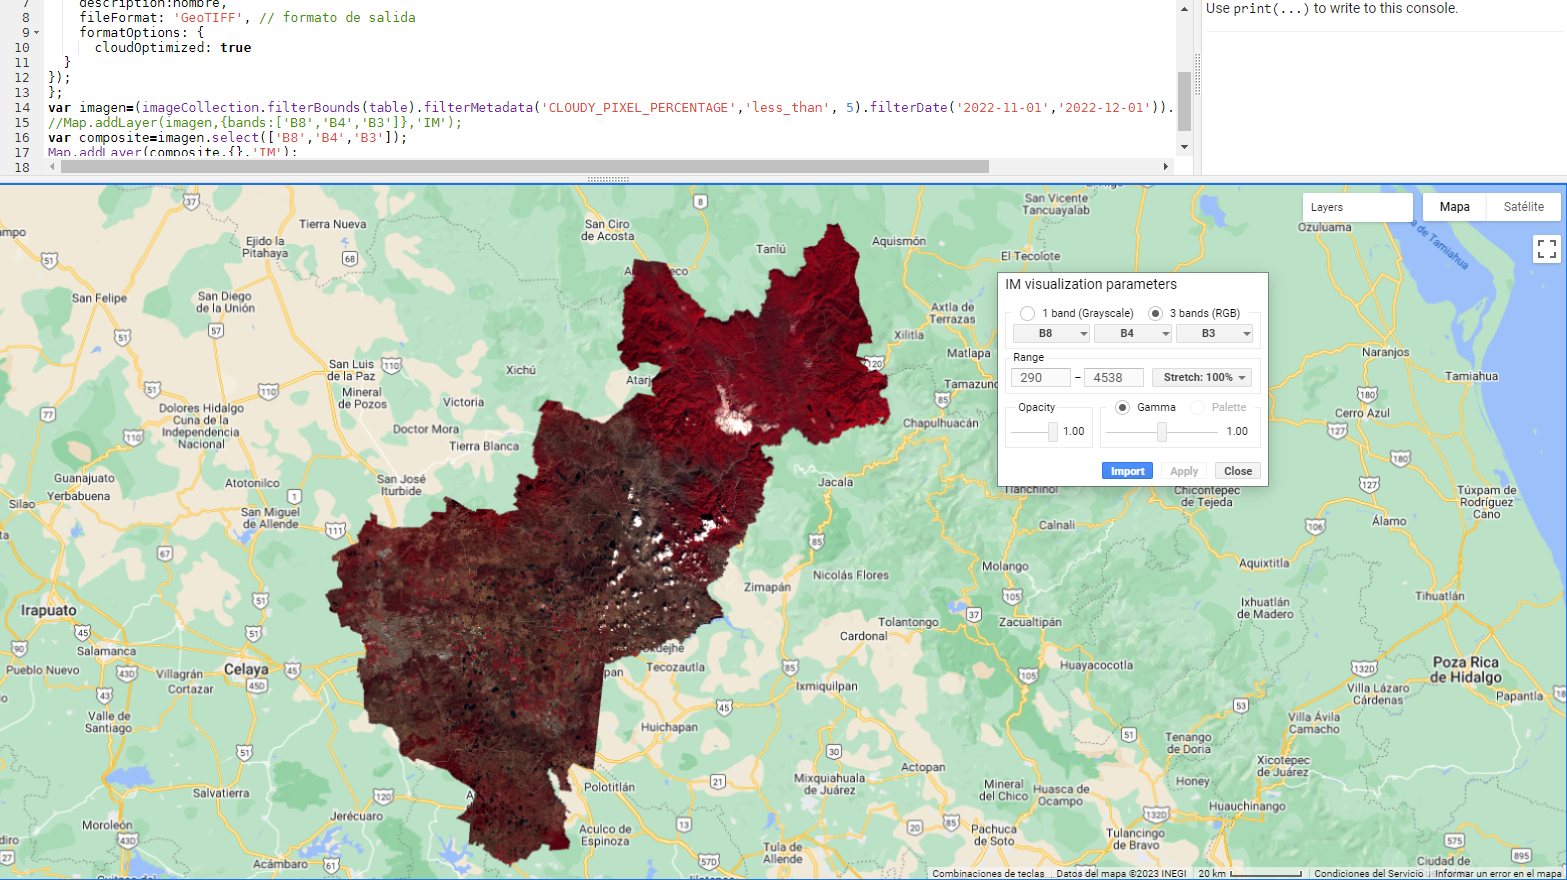

Se realizó un entrenamiento para identificar áreas de sembradas, preparadas para siembra y parcelas sin actividad agrícola a partir de fotointerpretaciòn.

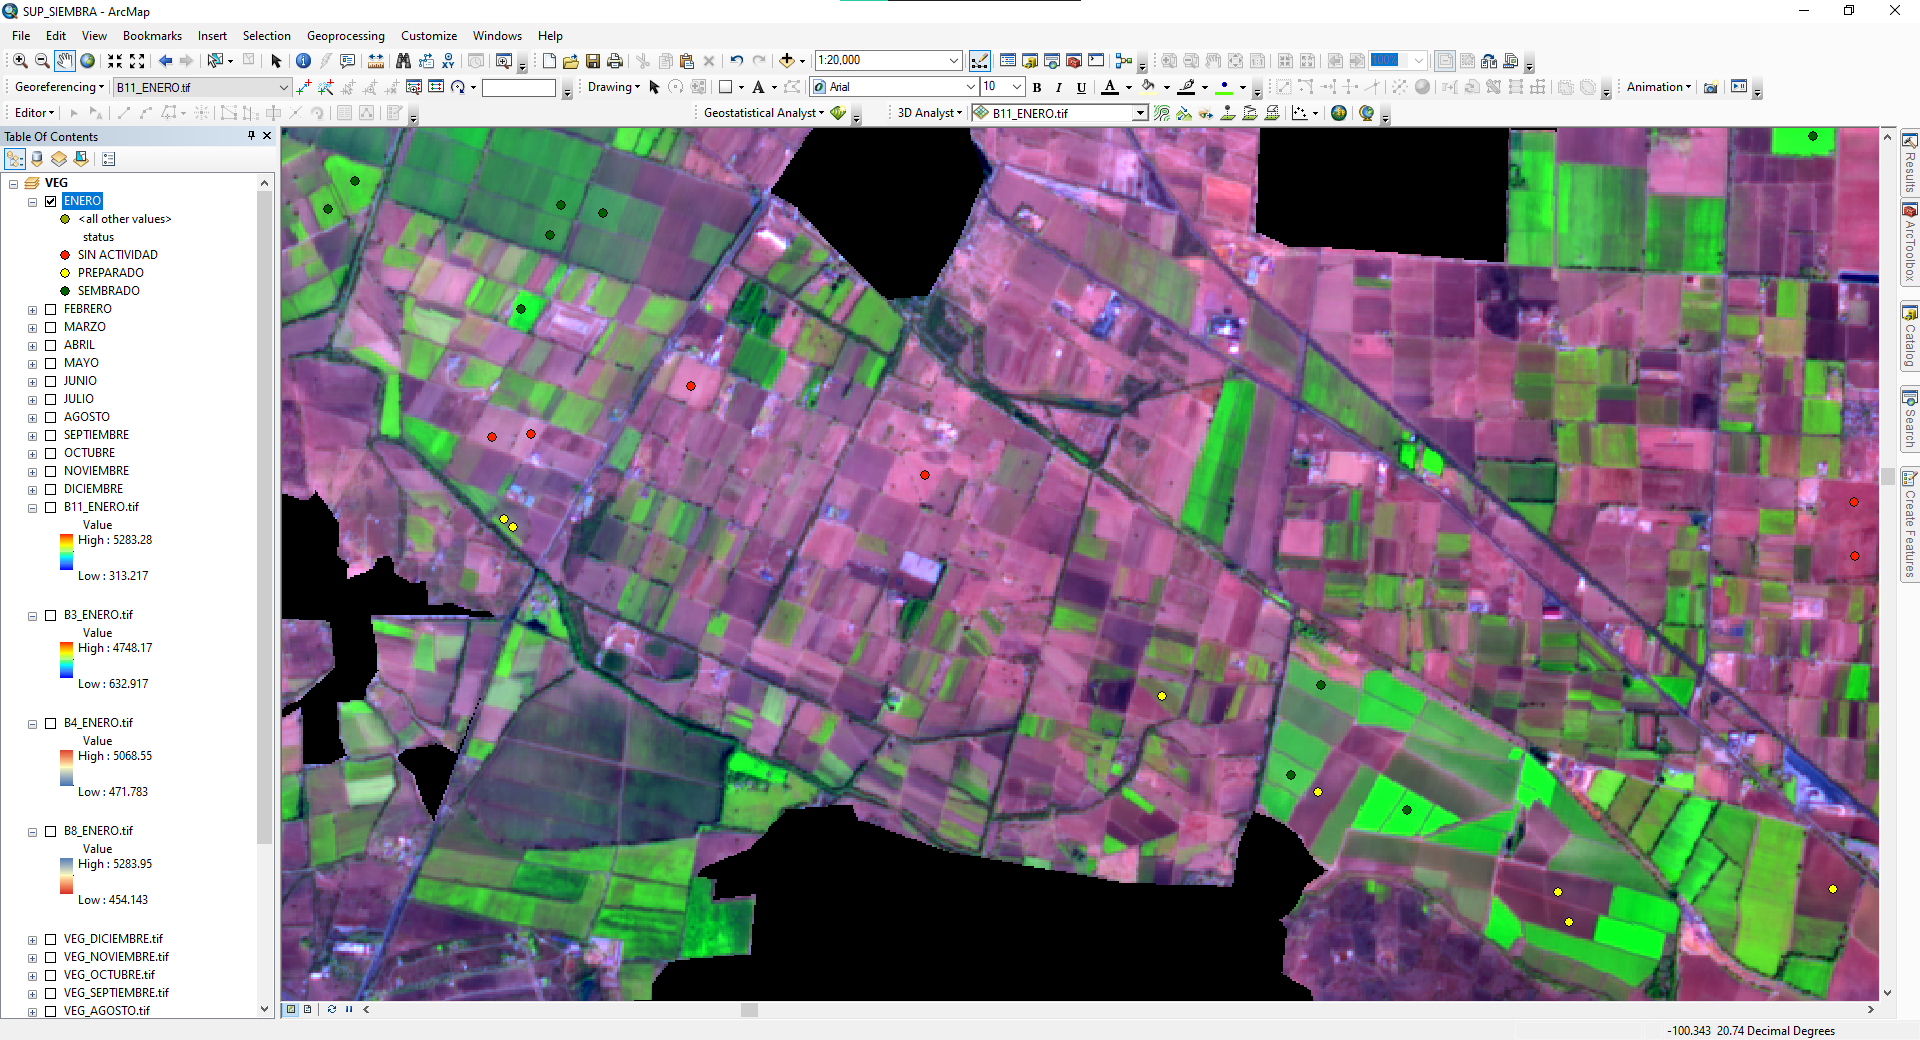

# ANÁLISIS EXPLORATORIO

Diccionario de Datos

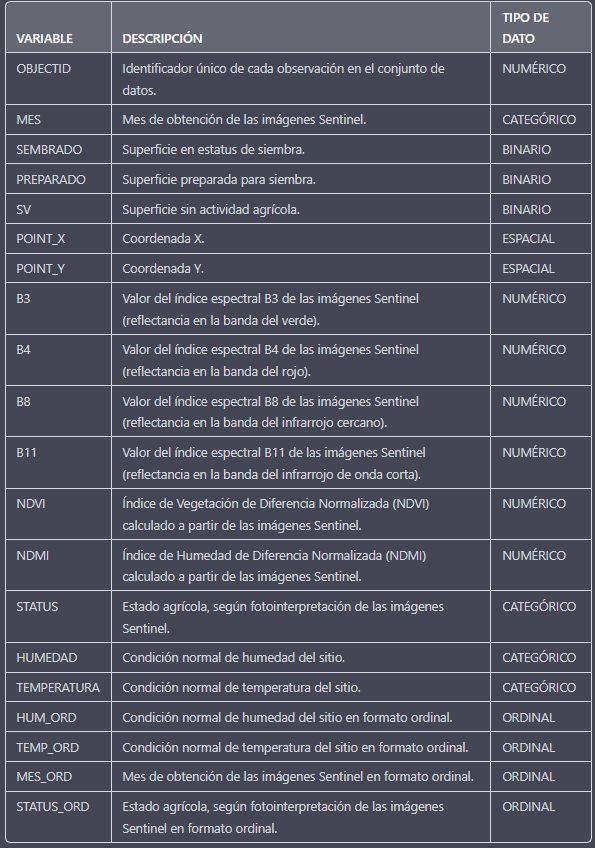

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
plt.style.use('ggplot')
import warnings
import sklearn
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
path="/content/drive/MyDrive/DOCUMENTOS/TRABAJO/ANALISIS_SIEMBRA/DATASET_SIEMBRA.csv"
df = pd.read_csv(path,sep=',',header=0,encoding='latin1')
df = df.rename(columns={'STATUS': 'ESTATUS','STATUS_ORD':'ESTATUS_ORD'})
df.head()

OBJECTID    MES  SEMBRADO  PREPARADO  SV     POINT_X    POINT_Y  \
0       445  ENERO         1          0   0 -100.275529  20.749692   
1       446  ENERO         1          0   0 -100.294862  20.717644   
2       447  ENERO         1          0   0 -100.298974  20.723573   
3       448  ENERO         1          0   0 -100.300402  20.719290   
4       449  ENERO         1          0   0 -100.337008  20.741448   

            B3           B4           B8          B11      NDVI      NDMI  \
0  1153.491667   940.541667  4228.416667  1525.058333  0.677746  0.450638   
1  1142.750000   928.266667  4371.650000  1409.091667  0.685861  0.513720   
2  1274.166667  1255.933333  3181.716667  1931.775000  0.405492  0.178517   
3  1304.316667  1252.425000  3591.016667  1926.808333  0.463587  0.250436   
4  1258.975000  1029.850000  4308.633333  1512.483333  0.706512  0.483229   

    ESTATUS HUMEDAD TEMPERATUR  HUM_ORD  TEMP_ORD  MES_ORD  ESTATUS_ORD  
0  SEMBRADO    BAJA       BAJA        1         3        1          3.0  
1  SEMBRADO    BAJA       BAJA        1         3        1          3.0  
2  SEMBRADO    BAJA       BAJA        1         3        1          3.0  
3  SEMBRADO    BAJA       BAJA        1         3        1          3.0  
4  SEMBRADO    BAJA       BAJA        1         3        1          3.0

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OBJECTID     1332 non-null   int64  
 1   MES          1332 non-null   object 
 2   SEMBRADO     1332 non-null   int64  
 3   PREPARADO    1332 non-null   int64  
 4   SV           1332 non-null   int64  
 5   POINT_X      1332 non-null   float64
 6   POINT_Y      1332 non-null   float64
 7   B3           1332 non-null   float64
 8   B4           1332 non-null   float64
 9   B8           1332 non-null   float64
 10  B11          1332 non-null   float64
 11  NDVI         1332 non-null   float64
 12  NDMI         1332 non-null   float64
 13  ESTATUS      1314 non-null   object 
 14  HUMEDAD      1332 non-null   object 
 15  TEMPERATUR   1332 non-null   object 
 16  HUM_ORD      1332 non-null   int64  
 17  TEMP_ORD     1332 non-null   int64  
 18  MES_ORD      1332 non-null   int64  
 19  ESTATU

In [69]:
df2 = df.copy()

In [70]:
df.isnull().sum().sort_values(ascending=False)

ESTATUS_ORD    18
ESTATUS        18
MES             0
MES_ORD         0
TEMP_ORD        0
HUM_ORD         0
TEMPERATUR      0
HUMEDAD         0
NDMI            0
NDVI            0
OBJECTID        0
B8              0
B4              0
B3              0
POINT_Y         0
POINT_X         0
SV              0
PREPARADO       0
SEMBRADO        0
B11             0
dtype: int64

## **Limpieza de Datos**



In [71]:
# Eliminar las filas que contienen NaN y duplicados
df = df.drop_duplicates()
df= df.dropna(axis=0)

# Eliminar las columnas que contienen NaN
df= df.dropna(axis=1)

In [72]:
df.isnull().sum().sort_values(ascending=False)

OBJECTID       0
MES            0
MES_ORD        0
TEMP_ORD       0
HUM_ORD        0
TEMPERATUR     0
HUMEDAD        0
ESTATUS        0
NDMI           0
NDVI           0
B11            0
B8             0
B4             0
B3             0
POINT_Y        0
POINT_X        0
SV             0
PREPARADO      0
SEMBRADO       0
ESTATUS_ORD    0
dtype: int64

**Cual la distribución de las distintas bandas e indices con respecto al estatus de actividad agricola?**

In [73]:
import plotly.express as px

fig = px.box(df, x="ESTATUS", y=["B3"], 
             title="Distribución de B3 según el estado de actividad agrícola")

fig.show()


In [74]:
fig = px.box(df, x="ESTATUS", y=["B4"], 
             title="Distribución de B4 según el estado de actividad agrícola")

fig.show()


In [75]:
fig = px.box(df, x="ESTATUS", y=["B8"], 
             title="Distribución de B8 según el estado de actividad agrícola")

fig.show()


In [76]:
fig = px.box(df, x="ESTATUS", y=["B11"], 
             title="Distribución de B11 según el estado de actividad agrícola")

fig.show()


In [77]:
fig = px.box(df, x="ESTATUS", y=["NDVI"], 
             title="Distribución de NDVI según el estado de actividad agrícola")

fig.show()


In [78]:
fig = px.box(df, x="ESTATUS", y=["NDMI"], 
             title="Distribución de NDMI según el estado de actividad agrícola")

fig.show()


Después de analizar la distribución de distintas bandas e índices con respecto al estatus de actividad agrícola en el conjunto de datos, se observa que ciertos umbrales presentan una amplitud considerable, lo que indica una gran variabilidad en los datos. Es posible que este fenómeno se deba a que el análisis se ha realizado en todo el universo de datos sin considerar factores temporales, como las variaciones en las condiciones climáticas y de cultivo a lo largo del tiempo.

Por lo tanto, se sugiere realizar un análisis de los umbrales por mes para obtener una visión más detallada y precisa de la relación entre las distintas bandas e índices y el estatus de actividad agrícola. De esta manera, se podrían identificar patrones y tendencias en los datos que no son evidentes en un análisis global y se podrían obtener conclusiones más acertadas y útiles para el proyecto.

**Cual la distribución de las distintas bandas e indices con respecto al estatus de actividad agricola por mes?**

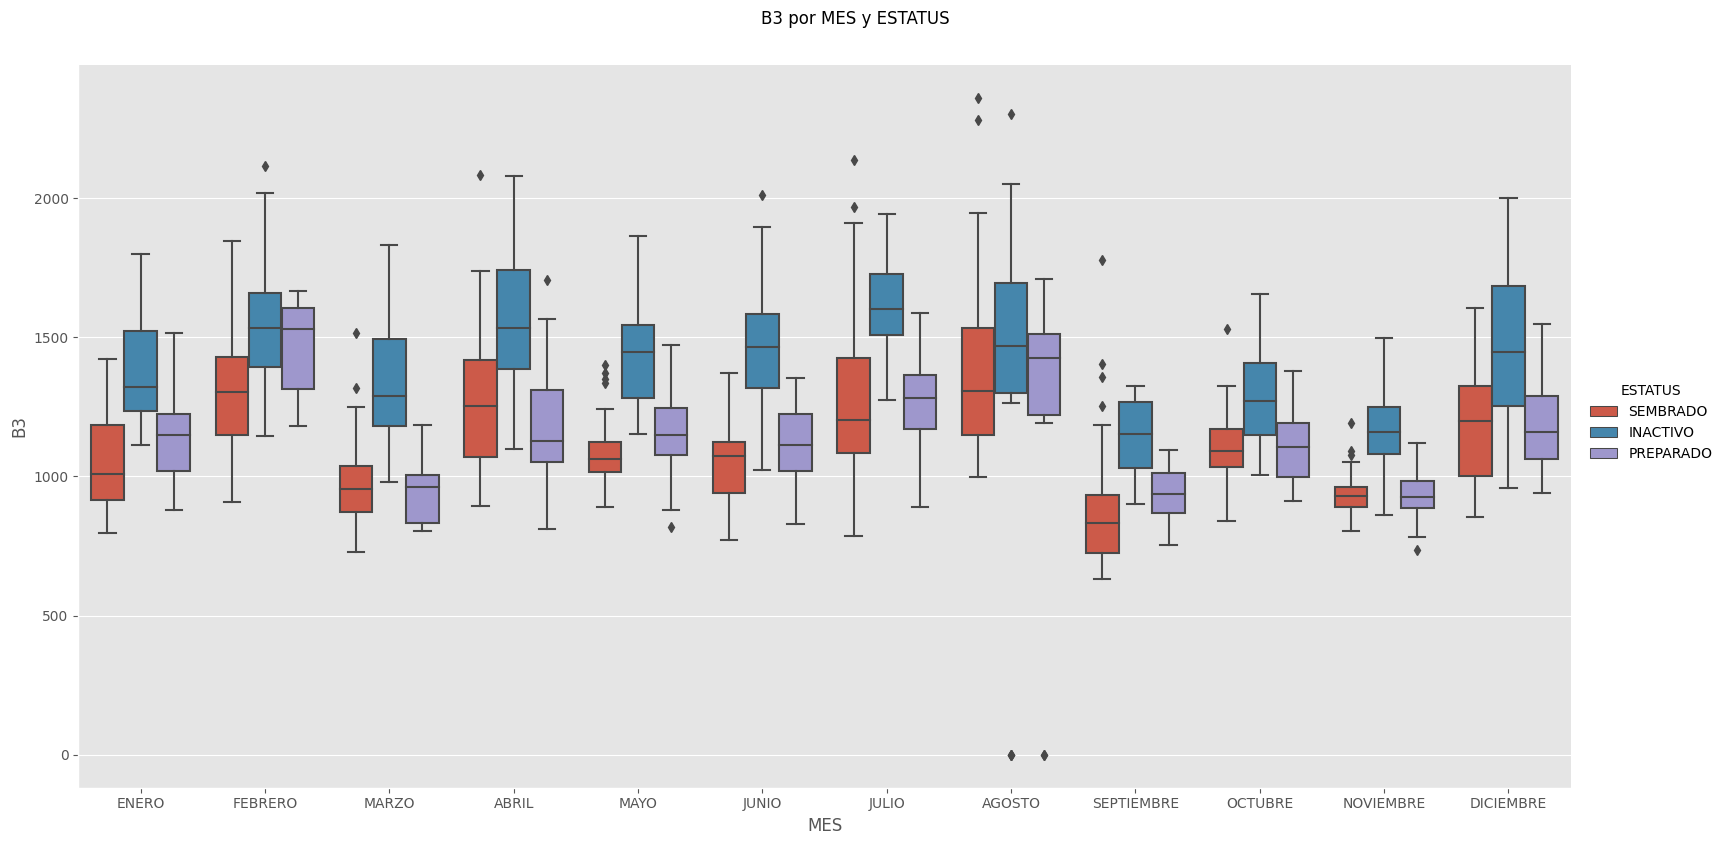

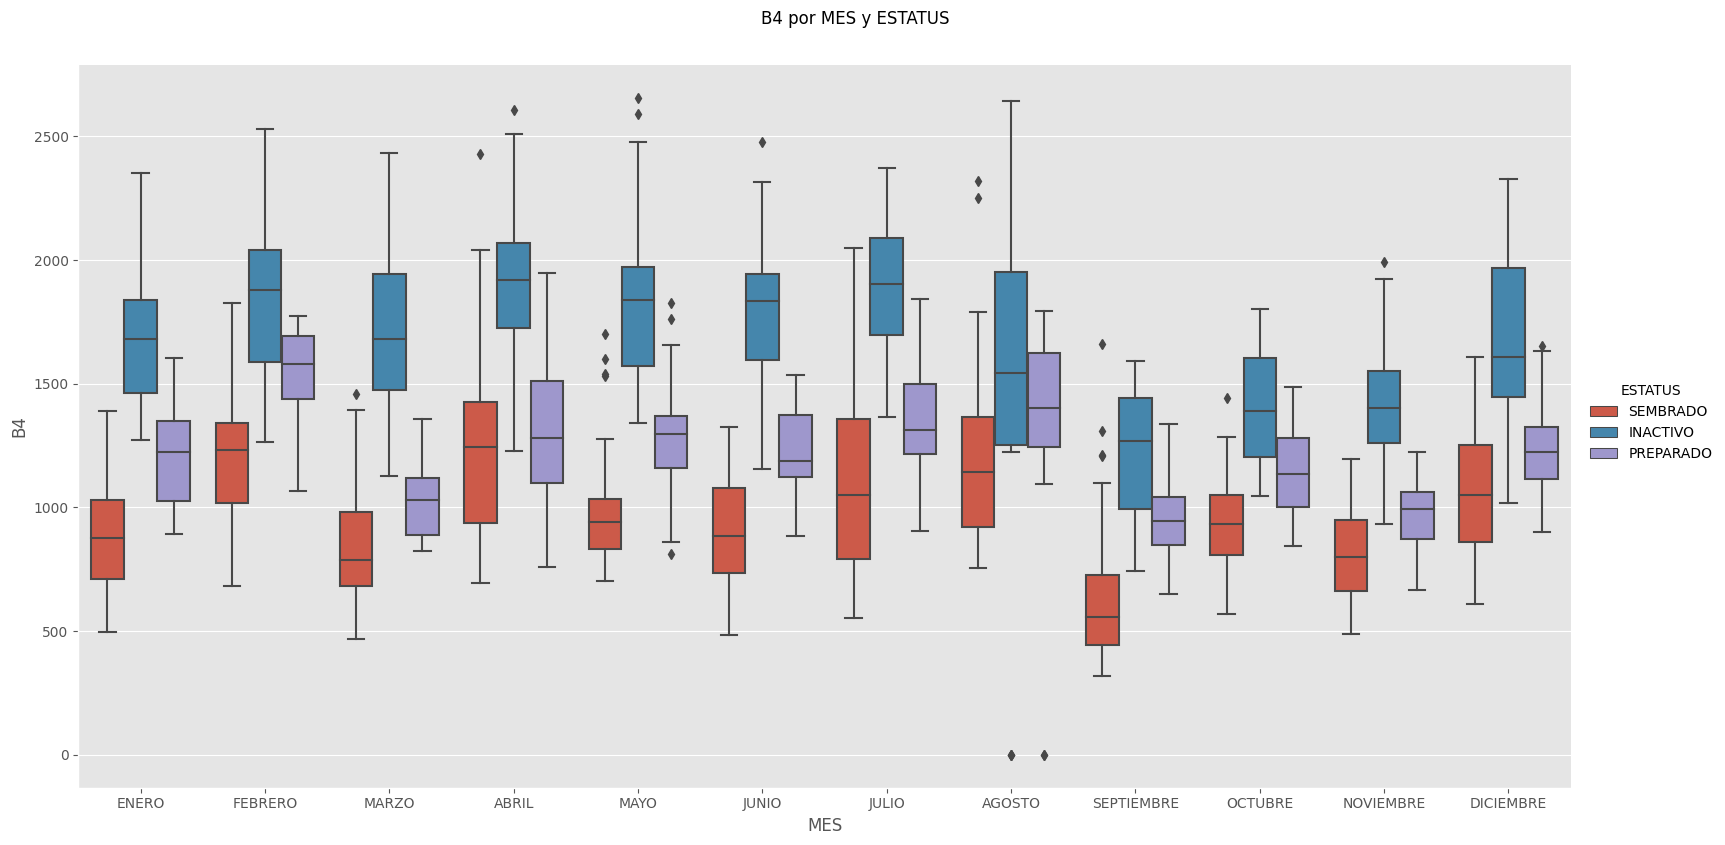

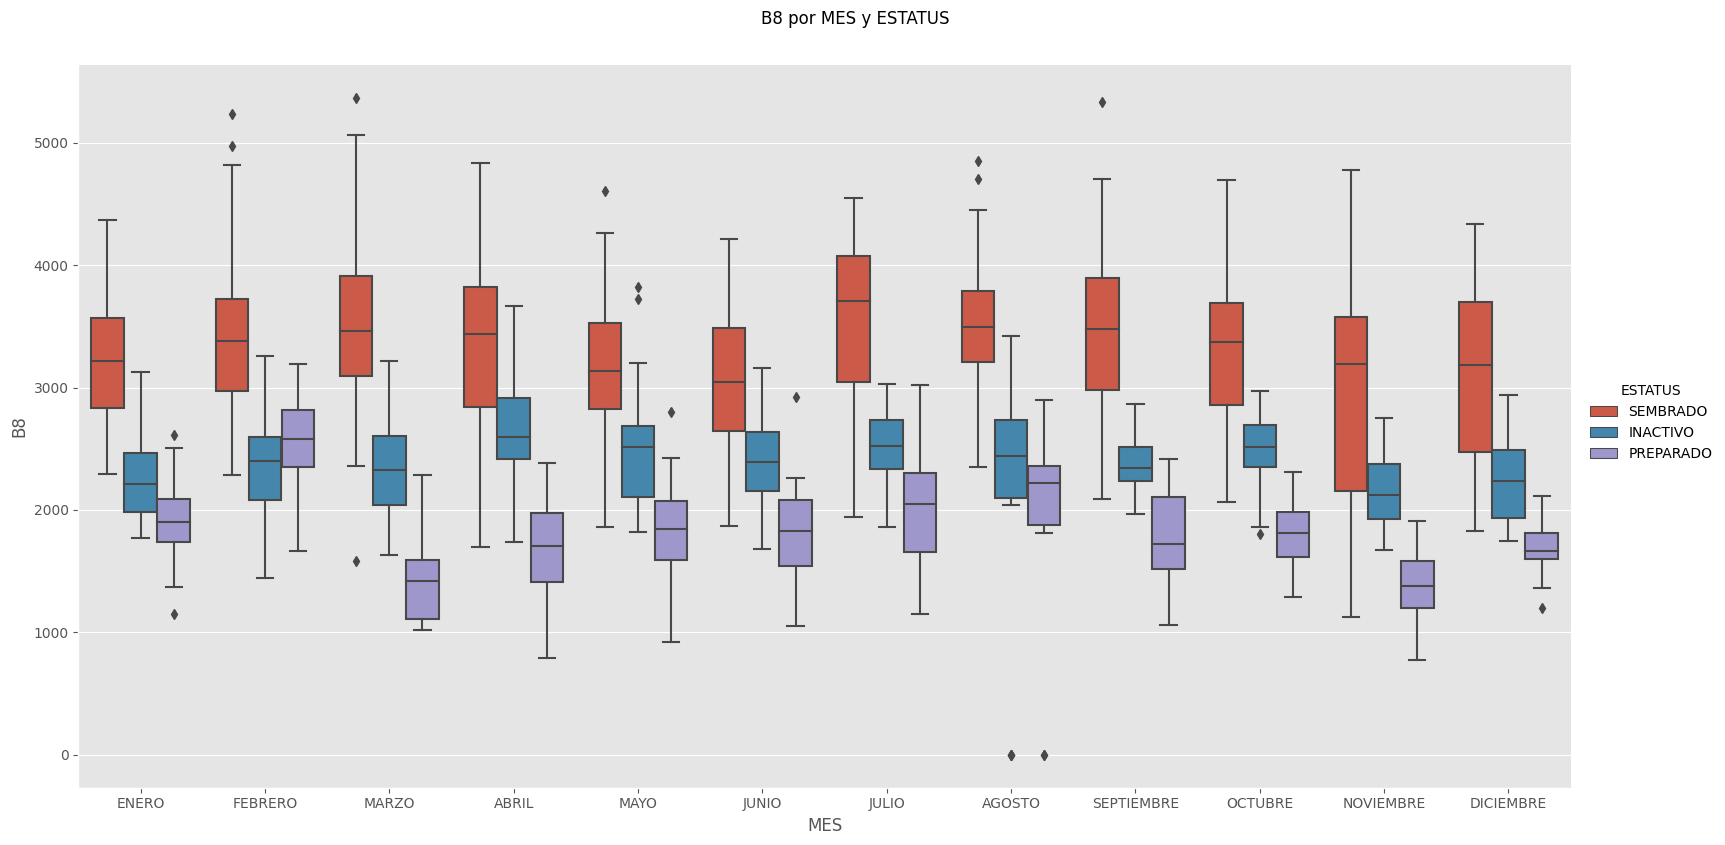

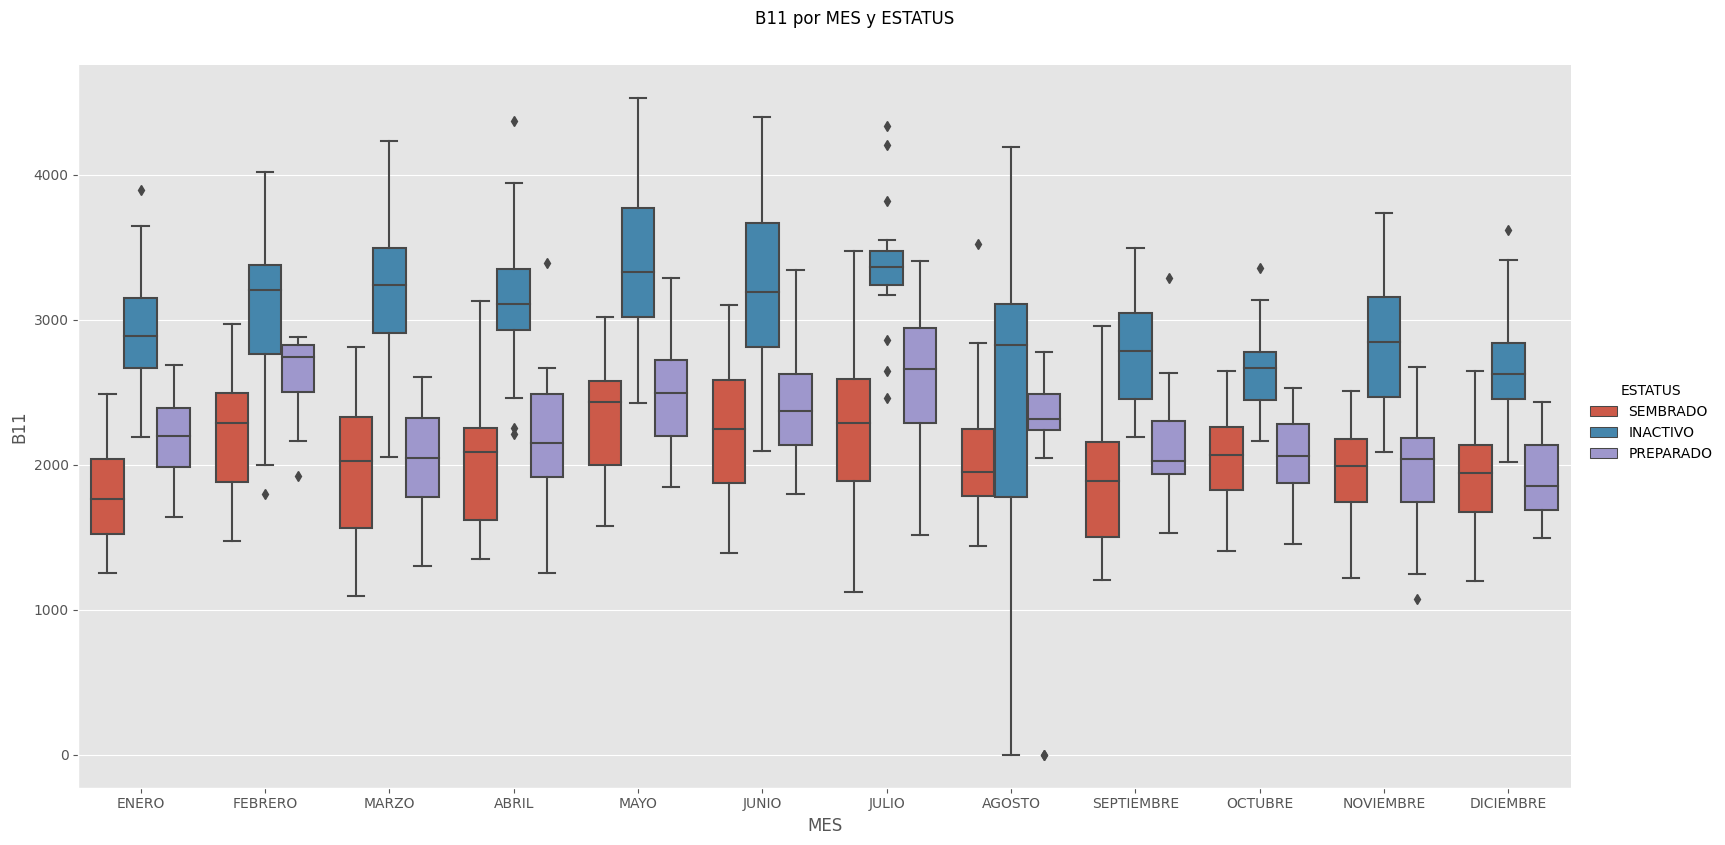

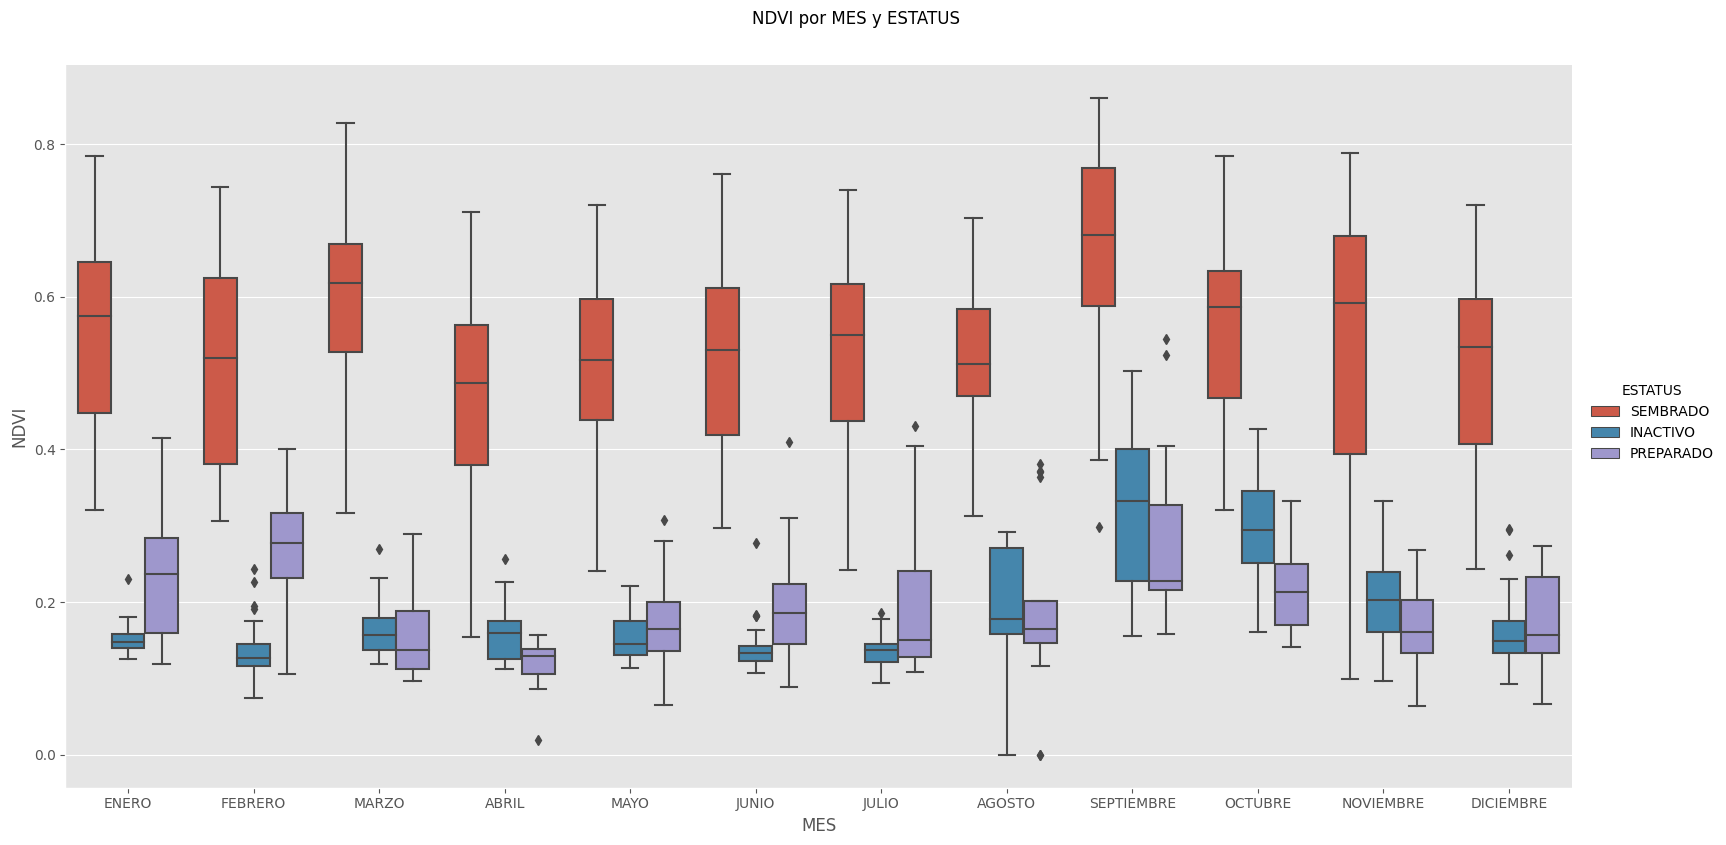

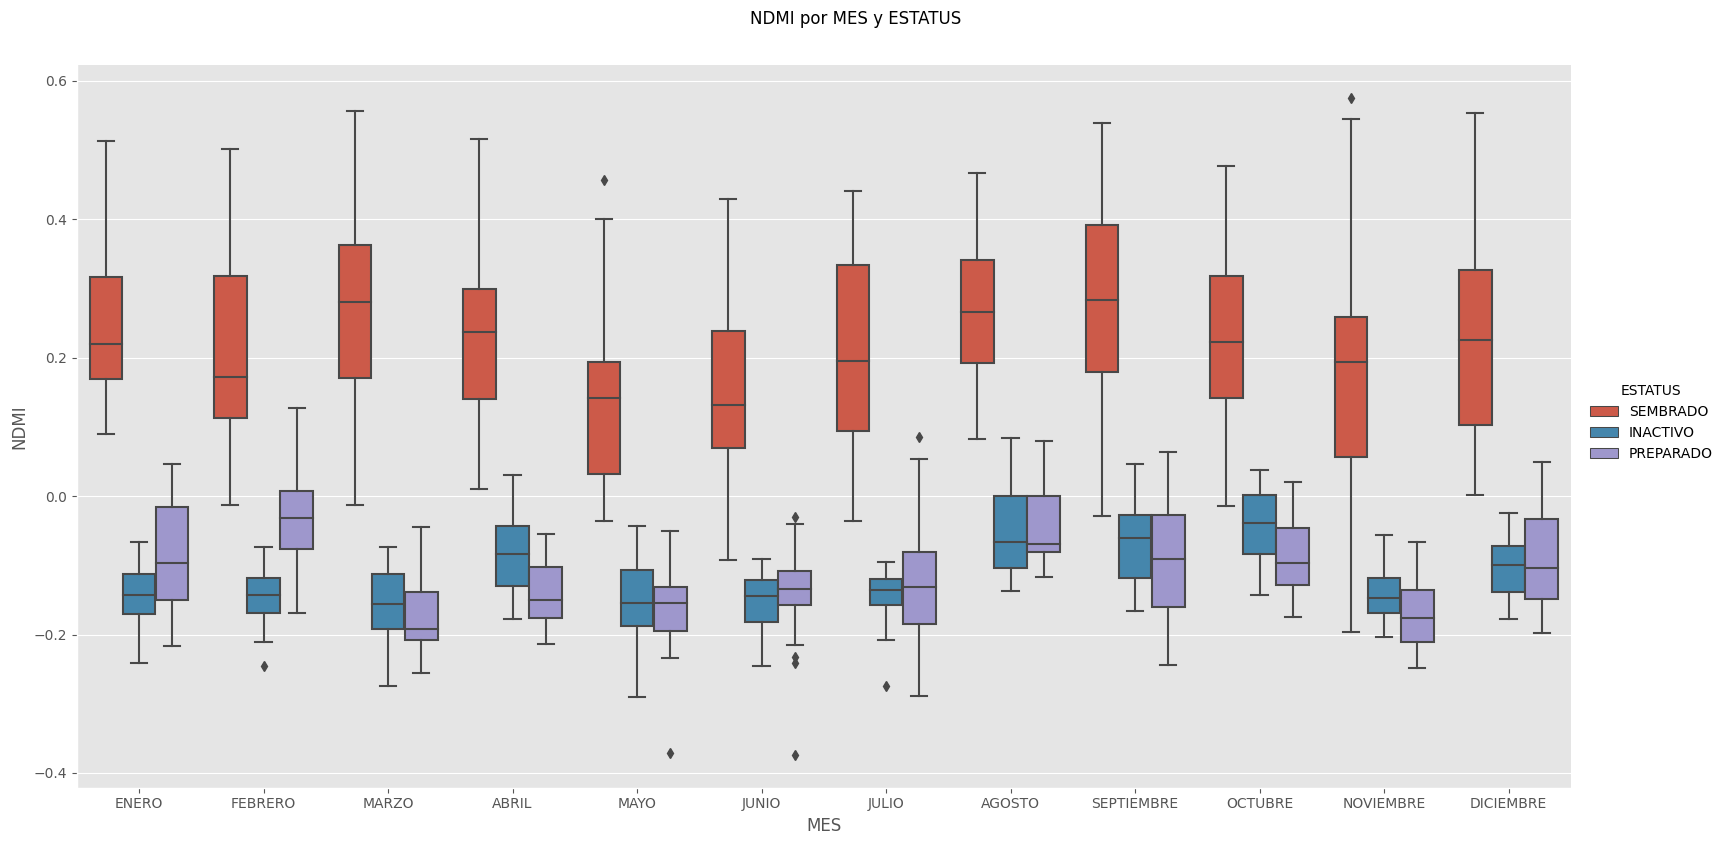

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['B3', 'B4', 'B8','B11', 'NDVI', 'NDMI']:
    g = sns.catplot(x='MES', y=var, hue='ESTATUS', kind='box', data=df, height=8, aspect=2)
    g.fig.suptitle(f'{var} por MES y ESTATUS', y=1.05)
    plt.show()


Durante el análisis del conjunto de datos, se pudo observar que los diferentes estados de actividad agrícola presentaron respuestas espectrales similares en ciertas bandas durante épocas específicas del año. 

Esto podría deberse a la presencia de ciertas condiciones ambientales, como la temperatura, la humedad y la luz solar, que afectan la respuesta espectral de los cultivos en ciertas bandas durante épocas específicas del año. 

**Cuales son las variables mas correlacionadas a los distintos estatus de actividad agrícola?**

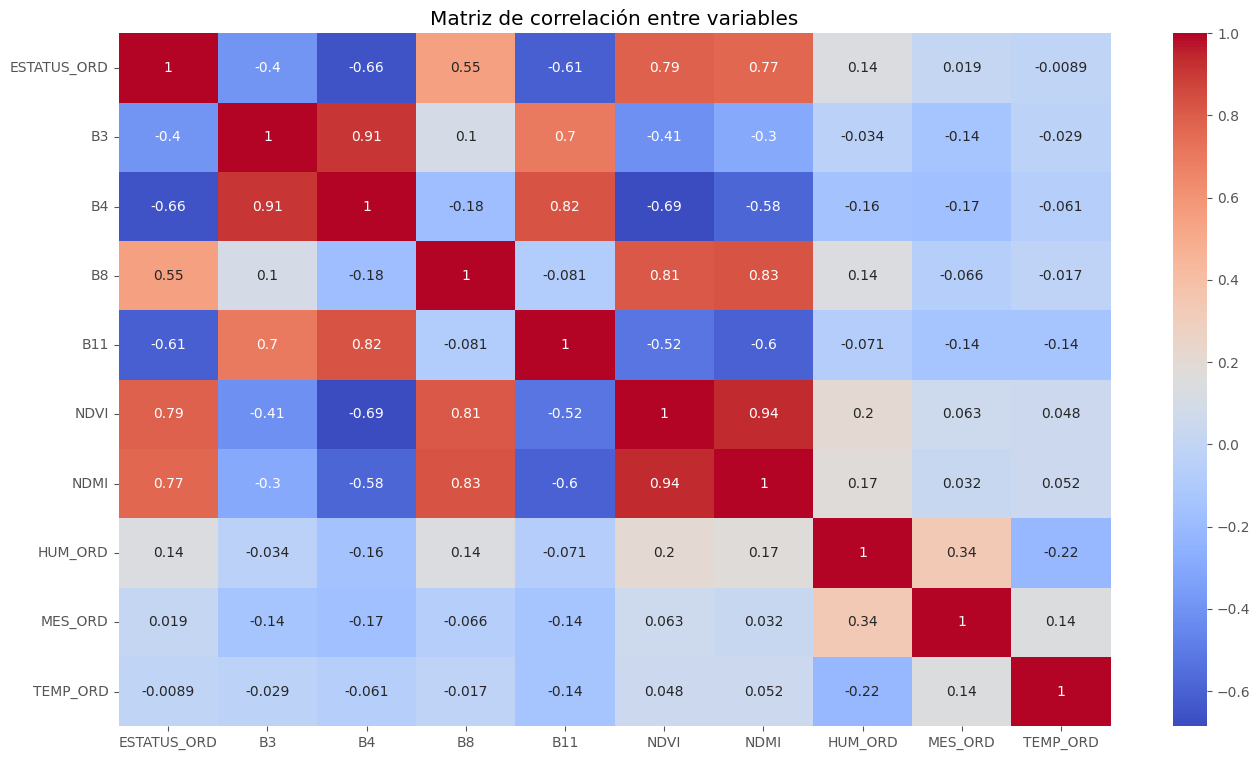

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
cols = ['ESTATUS_ORD','B3', 'B4', 'B8','B11', 'NDVI', 'NDMI','HUM_ORD','MES_ORD','TEMP_ORD']

# Calcular la matriz de correlación
corr = df[cols].corr()

# Visualizar la matriz de correlación con un mapa de calor
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Matriz de correlación entre variables')
plt.show()


1- Se encontró que el estatus de actividad agrícola presenta una mayor correlación positiva con los índices de vegetación NDVI y NDMI, así como con la banda B8. Dicha correlación positiva sugiere una posible relación entre el estado de actividad agrícola y la salud de la vegetación en las parcelas de cultivo.

La banda B8 de Sentinel 2, que corresponde al infrarrojo cercano (NIR), ha demostrado ser útil en la evaluación de la salud de los cultivos y la detección de cambios en la actividad agrícola. Según un estudio de investigación publicado por la revista Remote Sensing, se encontró una alta correlación entre la banda B8 y la fracción de cobertura vegetal en un área de cultivo de trigo. Además, otro estudio publicado en la revista Agricultural and Forest Meteorology encontró que la banda B8 es útil para detectar cambios en la actividad agrícola en regiones semiáridas de la India. En resumen, los estudios científicos indican que la banda B8 de Sentinel 2 es una herramienta valiosa para monitorear y evaluar la actividad agrícola.

2- Se encontró que el estatus de actividad agrícola presenta una mayor correlación negativa con las bandas B4 y B11. 

La correlación negativa entre la variable ESTATUS_ORD y las variables B4 y B11 sugiere que cuando los valores de reflectancia en estas longitudes de onda aumentan, la probabilidad de encontrar áreas con actividad agrícola (Sembrado o Preparado) disminuye. Es decir, puede haber una relación inversa entre la densidad de vegetación o la humedad del suelo (que se correlacionan positivamente con los valores de reflectancia en estas longitudes de onda) y la actividad agrícola en el área.

Una posible explicación de esta relación podría ser que las áreas con más vegetación o humedad del suelo sean más propensas a ser utilizadas para pastoreo o como áreas naturales, en lugar de ser dedicadas a la agricultura. Por otro lado, las áreas con valores más bajos de reflectancia en estas longitudes de onda pueden estar más secas o tener menos vegetación, lo que las hace más adecuadas para la agricultura.


# SELECCIÓN DEL MODELO

La selección del modelo adecuado es una etapa fundamental en cualquier proyecto de ciencia de datos, ya que puede tener un impacto significativo en la precisión y la interpretación de los resultados. En este trabajo, se presentará la justificación para la elección del modelo de árbol de decisión para predecir la variable ESTATUS_ORD.

En primer lugar, los árboles de decisión son modelos altamente interpretables que permiten la comprensión de las relaciones entre las variables y la variable objetivo mediante diagramas. Esto es especialmente útil en el contexto de la actividad agrícola, donde se pueden identificar fácilmente las variables más importantes y cómo se relacionan con la actividad agrícola.

En segundo lugar, los árboles de decisión son modelos flexibles que pueden manejar diferentes tipos de datos y tamaños de conjuntos de datos. Además, se pueden aplicar a problemas de clasificación y regresión, lo que los hace útiles para el análisis de imágenes satelitales.

En tercer lugar, los árboles de decisión son buenos para manejar relaciones no lineales entre las variables predictoras y la variable objetivo, lo que es especialmente importante en el caso de las imágenes satelitales.

En cuarto lugar, estos modelos tiene fácil implementación en plataformas de procesamiento de imágenes de satélite como lo es Google Earth Engine (GEE) en donde se pretendía automatizar el modelo para un monitoreo visual y periódico.

Por último, los árboles de decisión tienen un menor riesgo de sobreajuste que algunos otros modelos más complejos, como las redes neuronales o los bosques aleatorios. Esto significa que es menos probable que el modelo esté ajustado demasiado a los datos de entrenamiento y, por lo tanto, se pueda generalizar mejor a nuevos datos.

En conclusión, el modelo de árbol de decisión fue elegido como el más adecuado para predecir la variable ESTATUS_ORD a partir de imágenes satelitales en el contexto de la actividad agrícola debido a su interpretabilidad, flexibilidad, capacidad para manejar relaciones no lineales y menor riesgo de sobreajuste. Estas características hacen que los árboles de decisión sean una herramienta valiosa en el análisis de datos de imágenes satelitales en el ámbito de la actividad agrícola.

# ARBOL DE DESICIÓN

# Análisis de normalidad de datos

In [81]:
from scipy.stats import shapiro
import pandas as pd

# Cargar los datos
data = df

# Seleccionar las variables a analizar
variables = ['B3', 'B4', 'B8', 'B11', 'NDVI', 'NDMI', 'ESTATUS_ORD']

# Realizar la prueba de Shapiro-Wilk para cada variable
for variable in variables:
    datos = data[variable]
    stat, p = shapiro(datos)
    print('Variable:', variable)
    print('Estadística de prueba:', stat)
    print('P-valor:', p)
    if p > 0.05:
        print('No hay suficiente evidencia para rechazar la hipótesis nula de que los datos siguen una distribución normal')
    else:
        print('Los datos no siguen una distribución normal')
    print('--------------------------------------')


Variable: B3
Estadística de prueba: 0.9681262373924255
P-valor: 2.0426358341715063e-16
Los datos no siguen una distribución normal
--------------------------------------
Variable: B4
Estadística de prueba: 0.9835611581802368
P-valor: 4.638687003954978e-11
Los datos no siguen una distribución normal
--------------------------------------
Variable: B8
Estadística de prueba: 0.9897403120994568
P-valor: 5.8533679236916214e-08
Los datos no siguen una distribución normal
--------------------------------------
Variable: B11
Estadística de prueba: 0.9813620448112488
P-valor: 5.505914734554862e-12
Los datos no siguen una distribución normal
--------------------------------------
Variable: NDVI
Estadística de prueba: 0.9181392788887024
P-valor: 4.434975084706155e-26
Los datos no siguen una distribución normal
--------------------------------------
Variable: NDMI
Estadística de prueba: 0.9401917457580566
P-valor: 1.3443996000894635e-22
Los datos no siguen una distribución normal
-----------------

El hecho de que las variables predictoras no tengan una distribución normal puede afectar la precisión de los modelos predictivos, incluyendo los árboles de decisión. Cuando las variables no siguen una distribución normal, los modelos pueden tener dificultades para capturar la relación entre las variables y la variable de salida. Además, los valores extremos pueden tener un impacto excesivo en la construcción del modelo.

Sin embargo, aún es posible utilizar un árbol de decisión para predecir la variable de salida "ESTATUS_ORD" a partir de las variables predictoras "B3", "B4", "B8", "B11", "NDVI" y "NDMI". Es importante recordar que las pruebas de normalidad no son necesariamente requeridas para ajustar modelos predictivos.

# Modelación

In [82]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.metrics import classification_report

# Cargar el dataset
data = df

# Seleccionar las variables predictoras y la variable objetivo
predictors = ['B3', 'B4', 'B8', 'B11', 'NDVI', 'NDMI']
target = 'ESTATUS_ORD'

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target], test_size=0.2, random_state=42)

# Crear un modelo de árbol de decisión
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Imprimir el árbol de decisión en texto
tree_text = export_text(model, feature_names=predictors)
print(tree_text)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))

|--- NDMI <= 0.02
|   |--- B8 <= 1855.19
|   |   |--- NDVI <= 0.27
|   |   |   |--- class: 2.0
|   |   |--- NDVI >  0.27
|   |   |   |--- class: 3.0
|   |--- B8 >  1855.19
|   |   |--- B11 <= 2640.96
|   |   |   |--- class: 2.0
|   |   |--- B11 >  2640.96
|   |   |   |--- class: 1.0
|--- NDMI >  0.02
|   |--- NDVI <= 0.30
|   |   |--- NDMI <= 0.09
|   |   |   |--- class: 1.0
|   |   |--- NDMI >  0.09
|   |   |   |--- class: 3.0
|   |--- NDVI >  0.30
|   |   |--- NDMI <= 0.06
|   |   |   |--- class: 3.0
|   |   |--- NDMI >  0.06
|   |   |   |--- class: 3.0

Precisión del modelo: 84.41%


Como resultado de la modelación utilizando el algoritmo de árbol de decisión, se generó un modelo con una precisión del 84.41% para predecir el estatus de actividad agrícola a partir de imágenes satelitales. El modelo se construyó utilizando un conjunto de variables predictoras, incluyendo B3, B4, B8, B11, NDVI y NDMI.

El modelo generado consiste en un árbol de decisión con dos niveles, donde la variable NDMI es el nodo de decisión que divide el conjunto de datos en dos ramas. La rama izquierda del árbol se sigue dividiendo según los valores de B8, NDVI y B11, mientras que la rama derecha se sigue dividiendo según los valores de NDVI y NDMI.

Las diferentes condiciones del árbol representan las diferentes condiciones necesarias para predecir cada uno de los tres posibles estatus de actividad agrícola: sin actividad agrícola, preparado para siembra y sembrado. Por ejemplo, si la variable NDMI es menor o igual a 0.02, la rama izquierda del árbol se sigue dividiendo según los valores de B8, NDVI y B11. Si NDMI es mayor a 0.02, la rama derecha del árbol se sigue dividiendo según los valores de NDVI y NDMI.

La precisión del modelo del 84.41% indica que la predicción es razonablemente precisa, pero aún puede haber errores de predicción. Es importante tener en cuenta que este modelo se construyó utilizando un conjunto específico de variables predictoras y puede haber limitaciones en su capacidad para generalizar a otras áreas o condiciones.

En general, el modelo de árbol de decisión generado en este estudio puede ser una herramienta útil para predecir la actividad agrícola en áreas determinadas a partir de imágenes satelitales. Sin embargo, se recomienda validar y ajustar el modelo según sea necesario para garantizar una mayor precisión en la predicción de la actividad agrícola en áreas determinadas.

# Evaluación de efectividad del modelo

In [83]:
# Calcular las métricas de evaluación del modelo
reporte = classification_report(y_test, y_pred)
print(reporte)


              precision    recall  f1-score   support

         1.0       0.77      0.77      0.77        74
         2.0       0.69      0.78      0.73        58
         3.0       0.97      0.92      0.94       131

    accuracy                           0.84       263
   macro avg       0.81      0.82      0.81       263
weighted avg       0.85      0.84      0.85       263



El reporte de resultados muestra las métricas de evaluación del modelo para cada clase de la variable de salida y para el modelo en general. La precisión para la clase 1 fue del 77%, lo que indica que el 77% de las predicciones positivas para la clase 1 fueron verdaderamente positivas. Para la clase 2, la precisión fue del 69%, lo que indica que el 69% de las predicciones positivas para la clase 2 fueron verdaderamente positivas. La clase 3 tuvo la precisión más alta, con un valor de 0.97, lo que indica que el 97% de las predicciones positivas para la clase 3 fueron verdaderamente positivas.

La precisión promedio ponderada (weighted average) del modelo fue del 85%, lo que indica que el modelo tiene una buena capacidad de predicción en general. El valor F1-score para la clase 3 fue el más alto de todas las clases, con un valor de 0.94, lo que indica una alta precisión y recall para esta clase en particular.

# **Segunda Ronda de Feature Engineering**

Para ampliar el número de variables para el modelo se contemplo la adición de los datos de radar Sentinel-1.

Sentinel-1 es un satélite de observación de la Tierra que utiliza un radar de apertura sintética (SAR, por sus siglas en inglés) para adquirir imágenes de observación. El SAR emite pulsos de microondas y mide la señal de retorno para crear imágenes de la superficie de la Tierra. 

Esta información puede proporcionar información adicional sobre la estructura y textura del suelo lo que puede ser útil para complementar la información óptica de Sentinel-2 y mejorar la capacidad de discriminación de la vegetación y el suelo.




In [84]:
ruta="/content/drive/MyDrive/DOCUMENTOS/TRABAJO/ANALISIS_SIEMBRA/ds_v2.csv"

In [85]:
ds_v2 = pd.read_csv(ruta,sep=',')
print(ds_v2)

      OBJECTID        MES  SEMBRADO  PREPARADO  SV     POINT_X    POINT_Y  \
0          445      ENERO         1          0   0 -100.275529  20.749692   
1          446      ENERO         1          0   0 -100.294862  20.717644   
2          447      ENERO         1          0   0 -100.298974  20.723573   
3          448      ENERO         1          0   0 -100.300402  20.719290   
4          449      ENERO         1          0   0 -100.337008  20.741448   
...        ...        ...       ...        ...  ..         ...        ...   
1327       773  DICIEMBRE         0          0   1 -100.205305  20.778590   
1328       774  DICIEMBRE         0          0   1 -100.300616  20.780540   
1329       775  DICIEMBRE         0          0   1 -100.302579  20.780659   
1330       776  DICIEMBRE         0          1   0 -100.332263  20.783336   
1331       777  DICIEMBRE         0          1   0 -100.332858  20.786132   

               B3           B4           B8  ...      NDMI     STATUS  \
0 

In [86]:
ds_v2 = ds_v2.rename(columns={'STATUS': 'ESTATUS','STATUS_ORD':'ESTATUS_ORD'})
ds_v2.head()

OBJECTID    MES  SEMBRADO  PREPARADO  SV     POINT_X    POINT_Y  \
0       445  ENERO         1          0   0 -100.275529  20.749692   
1       446  ENERO         1          0   0 -100.294862  20.717644   
2       447  ENERO         1          0   0 -100.298974  20.723573   
3       448  ENERO         1          0   0 -100.300402  20.719290   
4       449  ENERO         1          0   0 -100.337008  20.741448   

            B3           B4           B8  ...      NDMI   ESTATUS  HUMEDAD  \
0  1153.491667   940.541667  4228.416667  ...  0.450638  SEMBRADO     BAJA   
1  1142.750000   928.266667  4371.650000  ...  0.513720  SEMBRADO     BAJA   
2  1274.166667  1255.933333  3181.716667  ...  0.178517  SEMBRADO     BAJA   
3  1304.316667  1252.425000  3591.016667  ...  0.250436  SEMBRADO     BAJA   
4  1258.975000  1029.850000  4308.633333  ...  0.483229  SEMBRADO     BAJA   

  TEMPERATUR HUM_ORD TEMP_ORD  MES_ORD  ESTATUS_ORD     VV     VH  
0       BAJA       1        3        1            3 -15.65 -20.22  
1       BAJA       1        3        1            3  -7.25 -15.81  
2       BAJA       1        3        1            3  -9.94 -20.28  
3       BAJA       1        3        1            3  -9.94 -18.80  
4       BAJA       1        3        1            3 -16.08 -22.48  

[5 rows x 22 columns]

In [87]:
# Eliminar las filas que contienen NaN y duplicados
ds_v2 = ds_v2.drop_duplicates()
ds_v2= ds_v2.dropna(axis=0)

# Eliminar las columnas que contienen NaN
ds_v2= ds_v2.dropna(axis=1)
ds_v2.isnull().sum().sort_values(ascending=False)

OBJECTID       0
MES            0
VV             0
ESTATUS_ORD    0
MES_ORD        0
TEMP_ORD       0
HUM_ORD        0
TEMPERATUR     0
HUMEDAD        0
ESTATUS        0
NDMI           0
NDVI           0
B11            0
B8             0
B4             0
B3             0
POINT_Y        0
POINT_X        0
SV             0
PREPARADO      0
SEMBRADO       0
VH             0
dtype: int64

In [88]:
variables = ['VV', 'VH']
# Realizar la prueba de Shapiro-Wilk para las nuevas variables
data = ds_v2
for variable in variables:
    datos = data[variable]
    stat, p = shapiro(datos)
    print('Variable:', variable)
    print('Estadística de prueba:', stat)
    print('P-valor:', p)
    if p > 0.05:
        print('No hay suficiente evidencia para rechazar la hipótesis nula de que los datos siguen una distribución normal')
    else:
        print('Los datos no siguen una distribución normal')
    print('--------------------------------------')


Variable: VV
Estadística de prueba: 0.9954851865768433
P-valor: 0.0005915820365771651
Los datos no siguen una distribución normal
--------------------------------------
Variable: VH
Estadística de prueba: 0.9955424666404724
P-valor: 0.0006615349557250738
Los datos no siguen una distribución normal
--------------------------------------


In [89]:
# Seleccionar las variables predictoras y la variable objetivo
predictors = ['B3', 'B4', 'B8', 'B11', 'NDVI', 'NDMI','VV','VH']
target = 'ESTATUS_ORD'

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target], test_size=0.2, random_state=42)

# Crear un modelo de árbol de decisión
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Imprimir el árbol de decisión en texto
tree_text = export_text(model, feature_names=predictors)
print(tree_text)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))

|--- NDMI <= 0.02
|   |--- B8 <= 1855.19
|   |   |--- NDVI <= 0.27
|   |   |   |--- class: 2
|   |   |--- NDVI >  0.27
|   |   |   |--- class: 3
|   |--- B8 >  1855.19
|   |   |--- B11 <= 2640.96
|   |   |   |--- class: 2
|   |   |--- B11 >  2640.96
|   |   |   |--- class: 1
|--- NDMI >  0.02
|   |--- NDVI <= 0.30
|   |   |--- NDMI <= 0.09
|   |   |   |--- class: 1
|   |   |--- NDMI >  0.09
|   |   |   |--- class: 3
|   |--- NDVI >  0.30
|   |   |--- NDMI <= 0.06
|   |   |   |--- class: 3
|   |   |--- NDMI >  0.06
|   |   |   |--- class: 3

Precisión del modelo: 84.41%


In [90]:
# Calcular las métricas de evaluación del modelo
reporte = classification_report(y_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

           1       0.77      0.77      0.77        74
           2       0.69      0.78      0.73        58
           3       0.97      0.92      0.94       131

    accuracy                           0.84       263
   macro avg       0.81      0.82      0.81       263
weighted avg       0.85      0.84      0.85       263



A pesar de que se agregaron nuevas variables, los resultados del modelo de árbol de decisión no parecen haber cambiado. La precisión del modelo y las métricas de evaluación siguen siendo las mismas. Podría ser necesario evaluar si las nuevas variables agregan valor predictivo al modelo y si su inclusión mejora las métricas de evaluación. Tal vez sea necesario explorar otros modelos y técnicas de aprendizaje automático para encontrar el mejor modelo para estos datos.

## **Validación cruzada**

Para evaluar si las nuevas variables agregaron valor predictivo al modelo, comparamos la precisión del modelo antes y después de incluir las nuevas variables con una validación cruzada y se calculó la precisión media en cada iteración para compararla con la precisión obtenida anteriormente sin las nuevas variables.

In [91]:
from sklearn.model_selection import cross_val_score

# Crear un modelo de árbol de decisión con las nuevas variables incluidas
model_new = DecisionTreeClassifier(max_depth=3, random_state=42)
predictors_new = ['B3', 'B4', 'B8', 'B11', 'NDVI', 'NDMI','VV','VH']
X_train_new = X_train[predictors_new]
X_test_new = X_test[predictors_new]

# Realizar una validación cruzada de 10 iteraciones y calcular la precisión media
scores = cross_val_score(model_new, X_train_new, y_train, cv=10)
mean_accuracy = scores.mean()

# Comparar la precisión media con la precisión obtenida anteriormente sin las nuevas variables
print('Precisión media con nuevas variables: {:.2f}%'.format(mean_accuracy * 100))
print('Precisión anterior sin nuevas variables: {:.2f}%'.format(accuracy * 100))



Precisión media con nuevas variables: 81.35%
Precisión anterior sin nuevas variables: 84.41%


La precisión media del modelo con las nuevas variables predictoras es de 81.35%, mientras que la precisión anterior sin las nuevas variables fue de 84.41%. Esto sugiere que las nuevas variables predictoras podrían no estar aportando un valor significativo al modelo en términos de mejora en la precisión.
Por lo tanto nos quedaremos con la antigua selección de variables previamente seleccionadas.

## **Optimización por Tecnicas de Hyperparametrización**

La optimización de hiperparámetros en modelos de árboles de decisión es un proceso importante para mejorar el rendimiento del modelo. Los hiperparámetros son parámetros que no se aprenden directamente del conjunto de datos, sino que se ajustan antes de entrenar el modelo. En modelos de árboles de decisión, algunos ejemplos de hiperparámetros incluyen la profundidad máxima del árbol, la cantidad mínima de muestras necesarias en un nodo hoja, el criterio de división utilizado y la cantidad mínima de muestras necesarias para dividir un nodo.

Una técnica comúnmente utilizada para la optimización de hiperparámetros en modelos de árboles de decisión es la búsqueda de cuadrícula. En esta técnica, se define un conjunto de valores para cada hiperparámetro y se entrena el modelo con todas las combinaciones posibles de esos valores. Luego, se selecciona la combinación de hiperparámetros que produce el mejor rendimiento en un conjunto de validación. 

Por esto, se utilizó GridSearchCV para optimizar el modelo.

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
predictors= ['B3', 'B4', 'B8', 'B11', 'NDVI', 'NDMI']
# Definir los valores de los hiperparámetros a explorar
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear un modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Definir el objeto de búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo con búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Imprimir la combinación de hiperparámetros y la precisión obtenida
print("Mejor combinación de hiperparámetros: ", grid_search.best_params_)
print("Precisión media en validación cruzada (5 folds): {:.2f}%".format(grid_search.best_score_ * 100))


Mejor combinación de hiperparámetros:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Precisión media en validación cruzada (5 folds): 84.49%


Una vez que encontramos la mejor combinación de hiperparámetros, se creó un nuevo modelo con esos valores.

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Definir los hiperparámetros óptimos
best_params = {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

# Crear un modelo de árbol de decisión con los hiperparámetros óptimos
model = DecisionTreeClassifier(**best_params, random_state=42)

# Entrenar el modelo con todo el conjunto de datos
model.fit(data[predictors], data[target])

# Hacer predicciones en el conjunto de datos completo
y_pred = model.predict(data[predictors])

# Calcular la precisión del modelo
accuracy = accuracy_score(data[target], y_pred)
tree_text = export_text(model, feature_names=predictors)
print(tree_text)
print('Precisión del modelo final: {:.2f}%'.format(accuracy * 100))


|--- NDMI <= 0.00
|   |--- B11 <= 2642.83
|   |   |--- B8 <= 1779.93
|   |   |   |--- NDVI <= 0.28
|   |   |   |   |--- NDVI <= 0.01
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- NDVI >  0.01
|   |   |   |   |   |--- class: 2
|   |   |   |--- NDVI >  0.28
|   |   |   |   |--- class: 3
|   |   |--- B8 >  1779.93
|   |   |   |--- NDMI <= -0.02
|   |   |   |   |--- B4 <= 1710.59
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- B4 >  1710.59
|   |   |   |   |   |--- class: 1
|   |   |   |--- NDMI >  -0.02
|   |   |   |   |--- B11 <= 1973.92
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- B11 >  1973.92
|   |   |   |   |   |--- class: 3
|   |--- B11 >  2642.83
|   |   |--- B4 <= 1846.07
|   |   |   |--- B4 <= 1317.60
|   |   |   |   |--- NDVI <= 0.23
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- NDVI >  0.23
|   |   |   |   |   |--- class: 1
|   |   |   |--- B4 >  1317.60
|   |   |   |   |--- B3 <= 1584.21
|   |   |   |   |   |--- class: 1
|   |   |   |   |---

El resultado en el modelo final al aplicar técnicas de optimización por hiperparámetros, permitió obtener una precisión del 88.20%. Esto demuestra la importancia de ajustar los hiperparámetros adecuadamente para mejorar la capacidad predictiva del modelo.

## **Redes Neuronales**

Debido a los requisitos del proyecto final, se ha decidido implementar un segundo modelo para predecir el estado de actividad agrícola a partir. El primer modelo utilizado fue un árbol de decisión, el cual logró una precisión del 84.41% y mejoró al 88.20% después de aplicar técnicas de optimización de hiperparámetros. Sin embargo, para explorar otras posibilidades de mejorar la precisión del modelo, se ha decidido probar con una red neuronal. Las redes neuronales son capaces de detectar patrones complejos en los datos y ajustar los pesos de sus neuronas para mejorar la precisión de las predicciones. Por lo tanto, implementar un modelo de redes neuronales podría ofrecer un mayor potencial de precisión y permitir la exploración de características y patrones más detallados en las imágenes de satélite. Además, esta técnica puede ser más efectiva en el procesamiento de grandes cantidades de datos, lo cual es fundamental en proyectos de ciencia de datos que involucran imágenes de alta resolución.

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Seleccionar las variables predictoras y la variable objetivo
X = df[['B3', 'B4', 'B8', 'B11', 'NDVI', 'NDMI']]
y = df['ESTATUS_ORD']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo de regresión lineal utilizando el conjunto de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el rendimiento del modelo utilizando el conjunto de prueba
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R2:', r2)
print('MSE:', mse)


R2: 0.7151591673649841
MSE: 0.20675035600650887


Aunque estos resultados son alentadores, se ha decidido realizar una optimización por hiperparámetros para ver si se puede mejorar aún más el rendimiento del modelo. La optimización por hiperparámetros permite ajustar los valores de los parámetros del modelo para encontrar la configuración óptima que maximice la precisión de las predicciones. Se espera que esta técnica pueda ayudar a mejorar la precisión del modelo de redes neuronales y ofrecer una mayor capacidad predictiva para la identificación del estado de actividad agrícola.

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import uniform

# Seleccionar las variables predictoras y la variable objetivo
X = df[['B3', 'B4', 'B8', 'B11', 'NDVI', 'NDMI']]
y = df['ESTATUS_ORD']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}


# Definir la función objetivo
def objective(params):
    model = LinearRegression(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return -r2_score(y_test, y_pred)  # Maximizar R2 es lo mismo que minimizar -R2

# Utilizar la búsqueda aleatoria para encontrar los mejores hiperparámetros
search = RandomizedSearchCV(estimator=LinearRegression(), param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
search.fit(X_train, y_train)
best_params = search.best_params_

# Entrenar un modelo utilizando los mejores hiperparámetros encontrados y evaluar su rendimiento
model = LinearRegression(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R2:', r2)
print('MSE:', mse)


R2: 0.7151591673649841
MSE: 0.20675035600650887


Después de evaluar los resultados del modelo de redes neuronales después de la optimización de hiperparámetros, se ha decidido que el modelo de árbol de decisión optimizado con hiperparámetros será la mejor solución para predecir el estado de actividad agrícola en las imágenes de satélite Sentinel 2. Aunque la red neuronal ofrece un mayor potencial para detectar patrones complejos en los datos, los resultados no mejoraron significativamente después de la optimización de hiperparámetros.

# **Conclusion**

En conclusión, se puede afirmar que es posible identificar y diferenciar con precisión las superficies preparadas para siembra y las superficies sembradas utilizando imágenes satelitales y técnicas de aprendizaje automático. Además, se ha demostrado que las bandas específicas de Sentinel 2, son útiles para monitorear y evaluar la actividad agrícola.

Las variables más correlacionadas a los diferentes estatus de actividad agrícola incluyen el índice de vegetación NDVI y NDMI, así como las bandas B4, B8 y B11. Estas correlaciones proporcionan información valiosa para comprender la relación entre la actividad agrícola y la salud de la vegetación en las parcelas de cultivo.

En cuanto a la comparación de los modelos de árbol de decisión y redes neuronales, ambos son efectivos, pero el modelo de árbol de decisión demostró una mayor precisión después de la optimización de hiperparámetros. En general, la percepción remota y la ciencia de datos pueden utilizarse para mejorar la productividad y la sostenibilidad en la agricultura en diferentes regiones geográficas.



